# MCO Graph

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as seabornInstance 
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C19 MCO.csv')
df = df.dropna()

In [3]:
print(df)

    day      date  new_cases_malaysia  total_cases_malaysia  \
0    55  18-03-20                 117                   790   
1    56  19-03-20                 110                   900   
2    57  20-03-20                 130                  1030   
3    58  21-03-20                 153                  1183   
4    59  22-03-20                 123                  1306   
5    60  23-03-20                 212                  1518   
6    61  24-03-20                 106                  1624   
7    62  25-03-20                 172                  1796   
8    63  26-03-20                 235                  2031   
9    64  27-03-20                 130                  2161   
10   65  28-03-20                 159                  2320   
11   66  29-03-20                 150                  2470   
12   67  30-03-20                 156                  2626   
13   68  31-03-20                 140                  2766   
14   69  01-04-20                 142                  

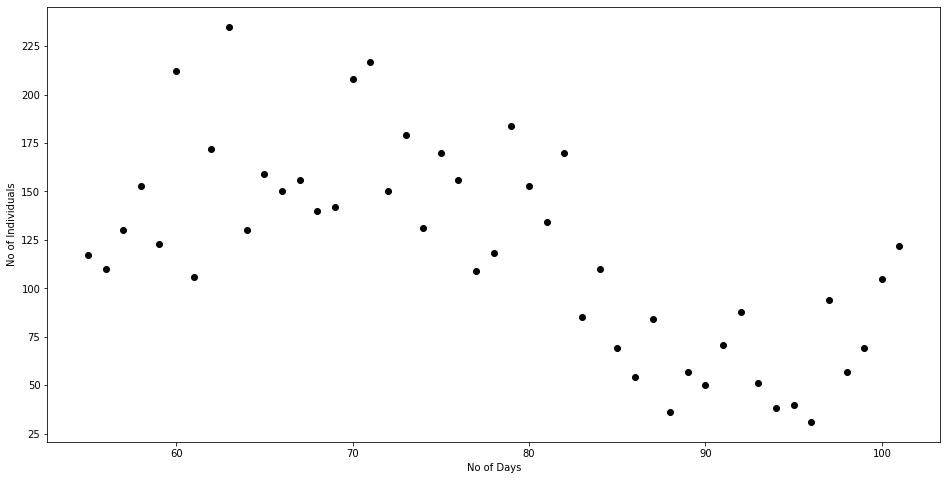

In [4]:
plt.figure(figsize=(16,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.xlabel("No of Days")
plt.ylabel("No of Individuals")
plt.show()

In [5]:

X = df['day'].values.reshape(-1,1)
Y = df['new_cases_malaysia'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 313.37 + -2.4832X


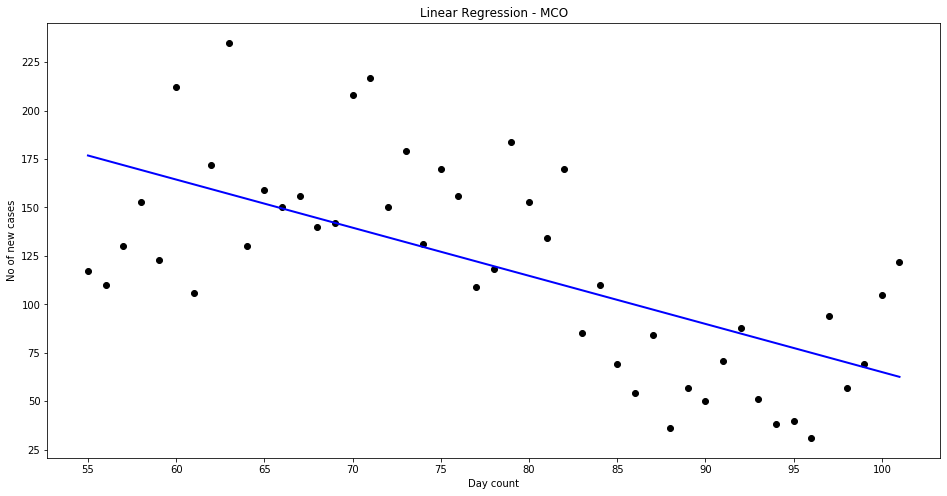

In [7]:
predictions = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.plot(
    df['day'],
    predictions,
    c='blue',
    linewidth = 2
)

plt.xticks(np.arange(min(df['day']), max(df['day']), 5.0))
plt.xlabel("Day count")
plt.ylabel("No of new cases")
plt.title('Linear Regression - MCO')
plt.show()

In [14]:
X = df['day']
Y = df['new_cases_malaysia']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print("================================ MCO Results =================================")
print( est2.summary())

================================ MCO Results =================================
                            OLS Regression Results                            
Dep. Variable:     new_cases_malaysia   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     32.90
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           7.68e-07
Time:                        20:58:34   Log-Likelihood:                -239.35
No. Observations:                  47   AIC:                             482.7
Df Residuals:                      45   BIC:                             486.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------